In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [7]:
def mylsq(tau,f1,f2):
    N=len(f1)
    return np.abs(f1*np.exp(2J * np.pi * np.arange(N)*tau/N)-f2)

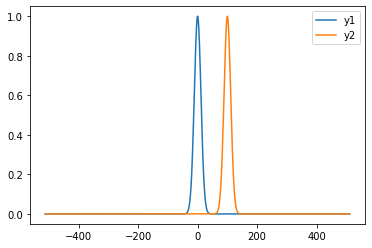

In [2]:
N=1024
t=np.arange(-N//2,N//2)
y1=np.exp(-t**2/250)
y2=np.exp(-(t-100)**2/250)
plt.plot(t,y1,label='y1')
plt.plot(t,y2,label='y2')
plt.legend()

In [13]:
ft1 = np.fft.fft(y1)
ft2 = np.fft.fft(y2)
xcorr = ft1*np.conj(ft2)

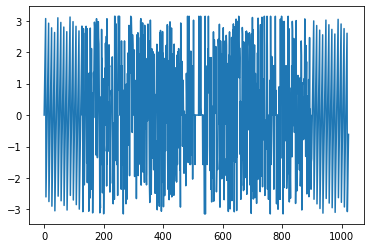

In [14]:
plt.plot(np.angle(xcorr))

In [15]:
least_squares(mylsq,80,method='trf',ftol=None,xtol=1e-12,args=(ft1,ft2))

 active_mask: array([0.])
        cost: 19147.481077394106
         fun: array([ 0.        , 29.38334818, 49.64768499, ..., 30.99008106,
        2.60010748, 27.12323979])
        grad: array([-0.1041467])
         jac: array([[ 0.00000000e+00],
       [ 1.45960872e-01],
       [ 1.52550627e-01],
       ...,
       [-1.41856994e+02],
       [-1.73904709e+02],
       [ 1.53472488e+02]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 84
        njev: 80
  optimality: 0.10414669821716416
      status: 3
     success: True
           x: array([80.33731009])

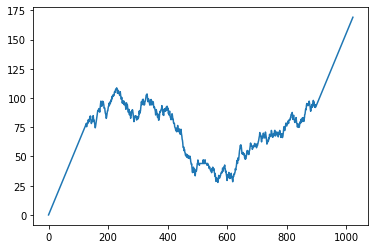

In [16]:
plt.plot(np.unwrap(np.angle(xcorr)))

In [29]:
xcorr = np.abs(np.fft.ifft(np.fft.fft(y1)*np.conj(np.fft.fft(y2))))

#jisko conjugate kiya hai, uske alawa jo hai usko +tau karo (advance)

#xcorr(a,b) = a(x+tau) * b(x) = A(k)* B_conj(k)

#tau negative matlab a ko delay karo match karwane ke liye...which makes sense


# similarly if xcorr(a,b) = a(x) * b(x-tau) = A(k)* B_conj(k)

# tau positive = b ko kitna delay karna padega. -ve aaya matlab b ko advance karo match karwane ke liye

# result of xcorr basically tells you "KISKO SHIFT KARNA PADEGA KITNA to make a match", not ki kitna shifted hai already.

#in case of coarse xcorr analysis, positive delay means: SNAP3 ko delay karna padega to make it match SNAP1.
# this means SNAP3 advanced hai already. = y1 above
# this means add delay to SNAP1 ka idxstart


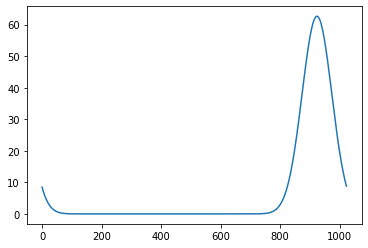

In [30]:
plt.plot(xcorr)

In [23]:
np.argmax(xcorr)

924

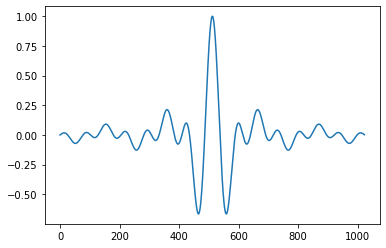

In [3]:
N=1024
n=np.arange(0,N)
k=10
y=np.cos(2*np.pi*k*n/N)*np.sinc(10*(n-N/2)/N)
ft = np.fft.fft(y)
plt.plot(y)

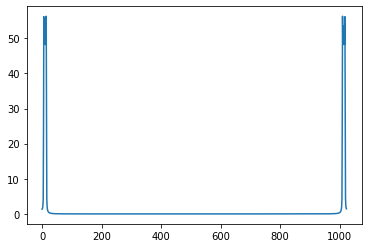

In [4]:
plt.plot(np.abs(np.fft.fft(y)))

In [9]:
ft2=ft*np.exp(-2J*np.pi*200.4*np.arange(0,N)/N)


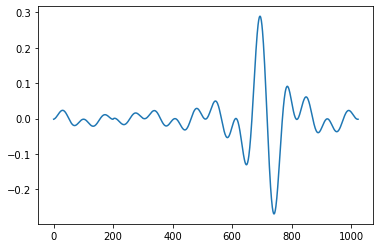

In [10]:
plt.plot(np.real(np.fft.ifft(ft2)))

In [11]:
xcorr = ft*np.conj(ft2)


In [12]:
yy=np.unwrap(np.angle(xcorr))
xx=np.arange(0,N)
m=np.sum(xx*yy)/np.sum(xx*xx)
print(m)

1.2296389995691273


In [13]:
m*N/(np.pi*2)

200.39999999999955

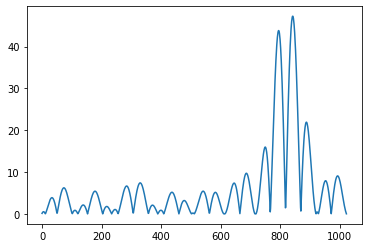

In [14]:
plt.plot(np.abs(np.fft.ifft(xcorr)))

In [16]:
maxidx=np.argmax(np.abs(np.fft.ifft(xcorr)))
delay=maxidx-N
print(delay)

-181


In [17]:
ft2_new = ft2 * np.exp(-2J * np.pi * delay * np.arange(0,N)/N )

In [19]:
xcorr = ft*np.conj(ft2_new)

yy=np.unwrap(np.angle(xcorr))
xx=np.arange(0,N)
m=np.sum(xx*yy)/np.sum(xx*xx)
print(m)
print(m*N/(np.pi*2))

0.11903690913992572
19.399999999999995


In [82]:
fs = 100
f1=10
f2=20
N=64
n = np.arange(0,256)
# delay = -32 - 2.5 #length//2 se jyada?
delay=-135
y1 = np.cos(2*np.pi*f1*n/fs) + np.cos(2*np.pi*f2*n/fs)
y2 = np.cos(2*np.pi*f1*n/fs + 2*np.pi*f1*delay/fs) + np.cos(2*np.pi*f2*n/fs + 2*np.pi*f2*delay/fs)

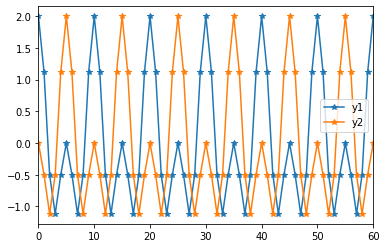

In [83]:
plt.plot(y1,'-*',label='y1')
plt.plot(y2,'-*',label='y2')
plt.xlim(0,60)
plt.legend()

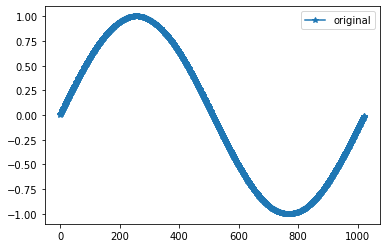

In [97]:
fs = 100
f=1
N=1024
n = np.arange(0,1024)
d = 64
plt.plot(np.sin(2*np.pi*f*n/N),'-*',label='original')
# plt.plot(np.sin(2*np.pi*f*n/256 + 2*np.pi*f*d/256),label='delayed')
plt.legend()

In [ ]:
exp(2 pi f k)